In [209]:
import nltk
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting on Chapters

This is another idea that Lee suggested - to split my books on their natural chapters instead of defined chunks of text. I thought it was a great idea, but there was definitely some upfront cost of time to split the books. My process remained essentially the same as with the 'two_books' file.

### Chapters Were Not Denoted Consistently, So I Handmarked

In [154]:
with open('doyle/marked/adventures_of_sherlock_holmes_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    adventures_of_sherlock_holmes_2 = contents.lower()
    aosh_chaps = adventures_of_sherlock_holmes_2.split('xyz2')
    aosh_chaps = aosh_chaps[1:]

In [155]:
len(aosh_chaps)

12

In [156]:
with open('doyle/marked/hound_of_the_baskervilles_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    hound_of_the_baskervilles_2 = contents.lower()
    hotb_chaps = hound_of_the_baskervilles_2.split('xyz2')
    hotb_chaps = hotb_chaps[1:]

In [157]:
len(hotb_chaps)

15

In [158]:
with open('doyle/marked/memoirs_of_sherlock_holmes_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    memoirs_of_sherlock_holmes_2 = contents.lower()
    mosh_chaps = memoirs_of_sherlock_holmes_2.split('xyz2')
    mosh_chaps = mosh_chaps[1:]

In [159]:
len(mosh_chaps)

7

In [160]:
with open('doyle/marked/return_of_sherlock_holmes_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    return_of_sherlock_holmes_2 = contents.lower()
    rosh_chaps = return_of_sherlock_holmes_2.split('xyz2')
    rosh_chaps = rosh_chaps[1:]

In [161]:
len(rosh_chaps)

13

In [162]:
with open('doyle/marked/sign_of_four_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    sign_of_four_2 = contents.lower()
    tsof_chaps = sign_of_four_2.split('xyz2')
    tsof_chaps = tsof_chaps[1:]

In [163]:
len(tsof_chaps)

12

In [164]:
with open('doyle/marked/study_in_scarlet_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    study_in_scarlet_2 = contents.lower()
    asis_chaps = study_in_scarlet_2.split('xyz2')
    asis_chaps = asis_chaps[1:]

In [165]:
len(asis_chaps)

14

In [166]:
with open('dickens/marked/a_tale_of_two_cities_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    a_tale_of_two_cities_2 = contents.lower()
    atotc_chaps = a_tale_of_two_cities_2.split('xyz2')
    atotc_chaps = atotc_chaps[1:]

In [167]:
len(atotc_chaps)

45

In [168]:
with open('dickens/marked/christmas_carol_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    christmas_carol_2 = contents.lower()
    acc_chaps = christmas_carol_2.split('xyz2')
    acc_chaps = acc_chaps[1:]

In [169]:
len(acc_chaps)

5

In [170]:
with open('dickens/marked/david_copperfield_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    david_copperfield_2 = contents.lower()
    dc_chaps = david_copperfield_2.split('xyz2')
    dc_chaps = dc_chaps[1:]

In [171]:
len(dc_chaps)

64

In [172]:
with open('dickens/marked/great_expectations_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    great_expectations_2 = contents.lower()
    ge_chaps = great_expectations_2.split('xyz2')
    ge_chaps = ge_chaps[1:]

In [173]:
len(ge_chaps)

59

In [174]:
with open('dickens/marked/oliver_twist_2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    oliver_twist_2 = contents.lower()
    ot_chaps = oliver_twist_2.split('xyz2')
    ot_chaps = ot_chaps[1:]

In [175]:
len(ot_chaps)

53

In [176]:
print len(aosh_chaps)
print len(hotb_chaps)
print len(mosh_chaps)
print len(rosh_chaps)
print len(tsof_chaps)
print len(asis_chaps)

12
15
7
13
12
14


In [177]:
print len(atotc_chaps)
print len(acc_chaps)
print len(dc_chaps)
print len(ge_chaps)
print len(ot_chaps)

45
5
64
59
53


### Visuals to Demonstrate Book Length

In [178]:
chapters = {'aosh': 12, 'hotb': 15, 'mosh': 7, 'rosh': 13, 'tsof': 12,
'aosh': 14, 'atotc': 45, 'acc': 5, 'dc': 64, 'ge': 59, 'ot': 53}

In [179]:
authors = np.array(['dickens', 'doyle', 'dickens', 'dickens', 'dickens', 'doyle',
                   'doyle', 'dickens', 'doyle', 'doyle'])

In [180]:
length_Series = pd.Series(chapters)
mini_df = pd.DataFrame(length_Series)
mini_df.rename(columns={0: 'chapters'}, inplace=True)
mini_df['author'] = authors
mini_df

,chapters,author
acc,5,dickens
aosh,14,doyle
atotc,45,dickens
dc,64,dickens
ge,59,dickens
hotb,15,doyle
mosh,7,doyle
ot,53,dickens
rosh,13,doyle
tsof,12,doyle


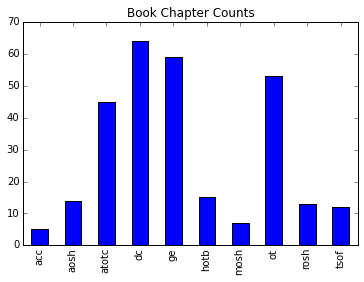

In [211]:
mini_df['chapters'].plot(kind='bar');
plt.title("Book Chapter Counts");

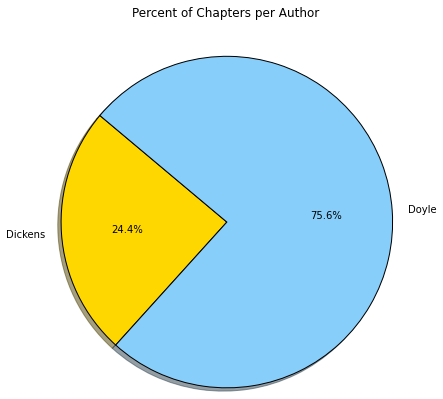

In [151]:
# https://pythonspot.com/matplotlib-pie-chart/

labels = 'Dickens', 'Doyle'
sizes = [73, 226]
colors = ['gold', 'lightskyblue']
 
plt.figure(figsize = (6,6))

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# http://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
plt.title("Percent of Chapters per Author", y=1.1)
plt.axis('equal')
plt.show()

In [69]:
all_chapters = aosh_chaps + hotb_chaps + mosh_chaps + rosh_chaps + tsof_chaps + asis_chaps + atotc_chaps + acc_chaps + dc_chaps + ge_chaps + ot_chaps

In [70]:
len(all_chapters)

299

### Vectorizing the Chapters

In [71]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(all_chapters)

In [72]:
tfidf

<299x25827 sparse matrix of type '<type 'numpy.float64'>'
	with 283120 stored elements in Compressed Sparse Row format>

In [73]:
tfidf.shape

(299, 25827)

In [74]:
tfidf_real = tfidf.todense()

In [76]:
tfidf_real.shape

(299, 25827)

In [77]:
type(tfidf_real)

numpy.matrixlib.defmatrix.matrix

In [152]:
vectorizer.get_feature_names()[:15]

[u'000',
 u'10',
 u'100',
 u'1000',
 u'10s',
 u'10th',
 u'11',
 u'1100',
 u'117',
 u'117th',
 u'12',
 u'120',
 u'126b',
 u'129',
 u'12s']

In [181]:
df = pd.DataFrame(tfidf_real, columns=vectorizer.get_feature_names())
df.head()

,000,10,100,1000,10s,10th,11,1100,117,117th,...,zealously,zenith,zero,zest,zigzag,zigzagged,zion,zoo,zoology,zum
0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,...,0,0,0.000000,0,0,0,0,0,0,0
1,0.043824,0.000000,0,0,0,0.000000,0.000000,0,0,0,...,0,0,0.000000,0,0,0,0,0,0,0
2,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,...,0,0,0.000000,0,0,0,0,0,0,0
3,0.000000,0.000000,0,0,0,0.000000,0.010222,0,0,0,...,0,0,0.000000,0,0,0,0,0,0,0
4,0.019115,0.017103,0,0,0,0.021606,0.000000,0,0,0,...,0,0,0.020149,0,0,0,0,0,0,0


### Creating My 'X' and 'y'

In [82]:
zeros = np.zeros(73)
ones = np.ones(226)
y = np.concatenate((zeros, ones))
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [84]:
X = tfidf_real
X

matrix([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.04382447,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

### Preparation for the Model

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [185]:
print len(X_test)
print len(X_train)

75
224


### Another Grid Search

In [102]:
svm_svc_grid = {'C': [0.25, .5, 1.0, 1.5, 1.75],
                          'kernel': ['linear', 'poly', 'rbf'],
                          'shrinking': [True, False]}

svm_svc_gridsearch = GridSearchCV(svm.SVC(),
                             svm_svc_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')

svm_svc_gridsearch.fit(X_test, y_test)

print "best parameters:", svm_svc_gridsearch.best_params_

best_model = svm_svc_gridsearch.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  84 out of  90 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.9s finished


best parameters: {'kernel': 'linear', 'C': 1.0, 'shrinking': True}


In [182]:
model_three = svm.SVC(kernel='linear')
model_three.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [189]:
cross_val_scores = cross_val_score(model_three, X_train, y_train, cv=10)
cross_val_scores

array([ 1.        ,  1.        ,  1.        ,  1.        ,  0.95652174,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

Unfortunately (it seems funny to say that), the model was (nearly) perfect again. A single fold on my k-folds cross validation did not return a perfect score, so at least that was some difference from my model performance in the 'two_book' file (when I did not split on natural chapters).

In [190]:
print sum(cross_val_scores)/len(cross_val_scores)

0.995652173913


In [188]:
model_three.score(X_test, y_test)

1.0

In [191]:
print classification_report(y_test,model_three.predict(X_test))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        15
        1.0       1.00      1.00      1.00        60

avg / total       1.00      1.00      1.00        75



Somewhat 'fed up' with the perfect performance of the SVM, I took a quick peak at some other classifiers - a Random Forest and Gradient Boosting. I just wanted to confirm that they would pretty much shred through the data as well, and the more or less did - ~96% for Random Forest and ~99-100% for GradientBoosting. At this point, I was starting to suspect that this may not be the way to attack the problem.

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rf = RandomForestClassifier()

In [194]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [207]:
cross_val_arr = cross_val_score(rf, X_train, y_train, cv=10)
cross_val_arr

array([ 0.91304348,  1.        ,  1.        ,  0.95652174,  0.86956522,
        1.        ,  1.        ,  0.95454545,  0.9047619 ,  0.95238095])

In [208]:
sum(cross_val_arr)/len(cross_val_arr)

0.95508187464709215

In [198]:
rf.score(X_test, y_test)

0.95999999999999996

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

In [132]:
gbc = GradientBoostingClassifier()

In [136]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [134]:
cross_val_arr2 = cross_val_score(gbc, X_train, y_train, cv=10)
cross_val_arr2

array([ 1.        ,  1.        ,  0.95652174,  1.        ,  0.95652174,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [137]:
sum(cross_val_arr2)/len(cross_val_arr2)

0.9913043478260869

In [138]:
gbc.score(X_test, y_test)

1.0